Fake news is the biggest problems because it leads to a lot of misinformation in a particular region. Most of the time, spreading false news about a community’s political and religious beliefs can lead to riots and violence as we must have seen in the country where we live. So, to detect fake news, we can find relationships between the fake news headlines so that we can train a machine learning model that can tell us whether a particular piece of information is fake or real by simply observing the headline in the news. 

The dataset we are using here is about the news title, news content, and a column known as label that shows whether the news is fake or real. 

We can use this dataset to find relationships between fake and real news headlines to understand what type of headlines are in most fake news.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv("news.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


This dataset is very large and luckily it still has no missing values so without wasting any time let’s use the title column as the feature we need to train a machine learning model and the label column as the values we want to predict:

In [4]:
x = np.array(data["title"])
y = np.array(data["label"])

cv = CountVectorizer()
x = cv.fit_transform(x)

Now let’s separate the dataset into training and testing sets, and then we’ll use the Multinomial Naive Bayes algorithm to train the fake news detection model:

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8074191002367798


Now let’s test this model. To test our trained model, we’ll first write down the title of any news item found on google news to see if our model predicts that the news is real or not:

In [6]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()

In [7]:
model.predict(data)

array(['REAL'], dtype='<U4')

Now we’re going to write a random fake news headline to see if the model predicts the news is fake or not:

In [8]:
news_headline = "Cow dung can cure Corona Virus"
data = cv.transform([news_headline]).toarray()

In [9]:
model.predict(data)

array(['FAKE'], dtype='<U4')

We’ll be using the **streamlit library** in Python to build an end-to-end application for the machine learning model to detect fake news in real-time.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("news.csv")

x = np.array(data["title"])
y = np.array(data["label"])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)

import streamlit as st
st.title("Fake News Detection System")
def fakenewsdetection():
    user = st.text_area("Enter Any News Headline: ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = model.predict(data)
        st.title(a)
fakenewsdetection()

We cannot run this code the same way we run our other Python programs. As we are using the streamlit library here, we you need to write a command mentioned below in our command prompt or terminal to run this code:

`streamlit run news.py`

Once this command executes, it will open a link on our default web browser that will display our output as a web interface for fake news detection, as shown below.

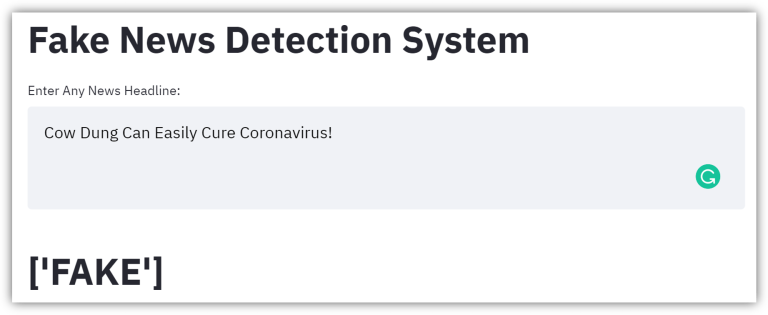

Now we can give input as a news headline and this application will show us if the news headline is fake or real.